In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_covid = pd.read_csv('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Time_Series_Forecasting_Covid19/Data/covid_mass_df_cleaned.csv')
df_resp = pd.read_csv('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Time_Series_Forecasting_Covid19/Data/respiratory_df_cleaned.csv')

In [2]:
#Handling Data Types
import pandas as pd

# date columns to datetime
date_columns = ['Week Start Date', 'Week End Date']
df_covid[date_columns] = df_covid[date_columns].apply(pd.to_datetime)
df_resp[date_columns] = df_resp[date_columns].apply(pd.to_datetime)


In [3]:
df_covid.drop(columns=['Group'], inplace=True)
df_covid.columns

Index(['Week Start Date', 'Week End Date', 'Subgroup', 'Estimated population',
       'Percent of the population', 'Cases during this week', 'Week case rate',
       'Cumulative cases', 'Cumulative case rate', 'Deaths during this week',
       'Week death rate', 'Cumulative deaths', 'Cumulative death rate',
       'Confirmed deaths', 'Confirmed cases'],
      dtype='object')

In [4]:
#Feature Engineering for covid data
# Time Lag Features
df_covid['Previous_Week_Case_Rate'] = df_covid['Week case rate'].shift(1)
df_covid['Previous_Week_Death_Rate'] = df_covid['Week death rate'].shift(1)
df_covid['Previous_Week_Cumulative_Cases'] = df_covid['Cumulative cases'].shift(1)

# Moving Averages
df_covid['Weekly_Case_Rate_Moving_Average'] = df_covid['Week case rate'].rolling(window=7).mean()
df_covid['Weekly_Death_Rate_Moving_Average'] = df_covid['Week death rate'].rolling(window=7).mean()

#Seasonal Features
df_covid['Month'] = df_covid['Week Start Date'].dt.month
df_covid['Season'] = df_covid['Week Start Date'].dt.quarter

# Demographic Ratios
df_covid['Cases_to_Population_Ratio'] = df_covid['Confirmed cases'] / df_covid['Estimated population']
df_covid['Deaths_to_Cases_Ratio'] = df_covid['Confirmed deaths'] / df_covid['Confirmed cases']

# Interaction Terms (Example: Interaction between Weekly Case Rate and Weekly Death Rate)
df_covid['Interaction_Case_Death_Rate'] = df_covid['Week case rate'] * df_covid['Week death rate']

# Display the engineered dataframe
# print(df_covid.head(5))


In [5]:
#'MMWR Week' time variable
#Creating lagged features for Time series data
df_resp['Previous_Week_Acute_Respiratory_Visits'] = df_resp['Rate of acute respiratory visits (per 100,000 residents)'].shift(1)
df_resp['Previous_Week_COVID_visit'] = df_resp['Rate of COVID visit per 100,000'].shift(1)
df_resp['Previous_Week_RSV_visit'] = df_resp['Rate of RSV visits per 100,000'].shift(1)
df_resp['Previous_Week_Influenza_visit'] = df_resp['Rate of Influenza visits per 100,000'].shift(1)

# Moving Averages
df_resp['Acute_Respiratory_Visits_Moving_Average'] = df_resp['Rate of acute respiratory visits (per 100,000 residents)'].rolling(window=7).mean()
df_resp['Previous_Week_COVID_visit'] = df_resp['Rate of COVID visit per 100,000'].rolling(window=7).mean()
df_resp['Previous_Week_RSV_visit'] = df_resp['Rate of RSV visits per 100,000'].rolling(window=7).mean()
df_resp['Previous_Week_Influenza_visit'] = df_resp['Rate of Influenza visits per 100,000'].rolling(window=7).mean()
# Seasonal Features
df_resp['Month'] = df_resp['Week Start Date'].dt.month
df_resp['Season'] = df_resp['Week Start Date'].dt.quarter

# Display the engineered dataframe
# print(df_resp.head())


In [6]:
df_covid.columns

Index(['Week Start Date', 'Week End Date', 'Subgroup', 'Estimated population',
       'Percent of the population', 'Cases during this week', 'Week case rate',
       'Cumulative cases', 'Cumulative case rate', 'Deaths during this week',
       'Week death rate', 'Cumulative deaths', 'Cumulative death rate',
       'Confirmed deaths', 'Confirmed cases', 'Previous_Week_Case_Rate',
       'Previous_Week_Death_Rate', 'Previous_Week_Cumulative_Cases',
       'Weekly_Case_Rate_Moving_Average', 'Weekly_Death_Rate_Moving_Average',
       'Month', 'Season', 'Cases_to_Population_Ratio', 'Deaths_to_Cases_Ratio',
       'Interaction_Case_Death_Rate'],
      dtype='object')

In [7]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_covid['Subgroup'])
df_covid['Subgroup_labeled'] = le.transform(df_covid['Subgroup'])
display(df_covid[['Subgroup', 'Subgroup_labeled']])
df_covid.drop(columns=['Subgroup'], inplace=True)

,Subgroup,Subgroup_labeled
0,"Hispanic, all races",11
1,"Asian, not Hispanic",8
2,"Black or African-American, not Hispanic",9
3,"Alaskan Native or American Indian, not Hispanic",7
4,"Other race, not Hispanic",14
...,...,...
675,35-49 years,1
676,50-64 years,3
677,65-79 years,4
678,80+ years,5


In [8]:
df_covid.head(5)

,Week Start Date,Week End Date,Estimated population,Percent of the population,Cases during this week,Week case rate,Cumulative cases,Cumulative case rate,Deaths during this week,Week death rate,...,Previous_Week_Death_Rate,Previous_Week_Cumulative_Cases,Weekly_Case_Rate_Moving_Average,Weekly_Death_Rate_Moving_Average,Month,Season,Cases_to_Population_Ratio,Deaths_to_Cases_Ratio,Interaction_Case_Death_Rate,Subgroup_labeled
0,2023-07-02,2023-07-08,878944.174599,0.125029,131,14.904246,131.0,14.904246,0,0.000000,...,NaN,NaN,NaN,NaN,7,3,0.000691,0.011532,0.000000,11
1,2023-07-02,2023-07-08,510096.110667,0.072561,29,5.685203,29.0,5.685203,1,0.196041,...,0.000000,131.0,NaN,NaN,7,3,0.001190,0.011532,1.114536,8
2,2023-07-02,2023-07-08,476930.244828,0.067843,53,11.112736,53.0,11.112736,0,0.000000,...,0.196041,29.0,NaN,NaN,7,3,0.001273,0.011532,0.000000,9
3,2023-07-02,2023-07-08,9939.379615,0.001414,0,0.000000,0.0,0.000000,0,0.000000,...,0.000000,53.0,NaN,NaN,7,3,0.061070,0.011532,0.000000,7
4,2023-07-02,2023-07-08,0.000000,0.000000,23,0.000000,23.0,0.000000,1,0.000000,...,0.000000,0.0,NaN,NaN,7,3,inf,0.011532,0.000000,14


In [9]:
# df_covid.drop(['Week End Date','Subgroup','Cumulative cases', 'Cumulative deaths', 'Cumulative case rate', 'Cumulative death rate',
#                'Confirmed deaths', 'Confirmed cases','County','Cumulative confirmed cases','Population','Cumulative tests', 
#                'Tests during the week', 'Positive tests the week','Week percent positivity','Month','Season','Interaction_Case_Death_Rate'], axis=1, inplace=True)

In [10]:
df_covid.columns

Index(['Week Start Date', 'Week End Date', 'Estimated population',
       'Percent of the population', 'Cases during this week', 'Week case rate',
       'Cumulative cases', 'Cumulative case rate', 'Deaths during this week',
       'Week death rate', 'Cumulative deaths', 'Cumulative death rate',
       'Confirmed deaths', 'Confirmed cases', 'Previous_Week_Case_Rate',
       'Previous_Week_Death_Rate', 'Previous_Week_Cumulative_Cases',
       'Weekly_Case_Rate_Moving_Average', 'Weekly_Death_Rate_Moving_Average',
       'Month', 'Season', 'Cases_to_Population_Ratio', 'Deaths_to_Cases_Ratio',
       'Interaction_Case_Death_Rate', 'Subgroup_labeled'],
      dtype='object')

In [11]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [12]:
#string to date format
df_covid['Week Start Date'] = pd.to_datetime(df_covid['Week Start Date'],infer_datetime_format=True)
df_covid = df_covid.set_index(['Week Start Date'])
df_covid.head(5)

,Week End Date,Estimated population,Percent of the population,Cases during this week,Week case rate,Cumulative cases,Cumulative case rate,Deaths during this week,Week death rate,Cumulative deaths,...,Previous_Week_Death_Rate,Previous_Week_Cumulative_Cases,Weekly_Case_Rate_Moving_Average,Weekly_Death_Rate_Moving_Average,Month,Season,Cases_to_Population_Ratio,Deaths_to_Cases_Ratio,Interaction_Case_Death_Rate,Subgroup_labeled
Week Start Date,,,,,,,,,,,,,,,,,,,,,
2023-07-02,2023-07-08,878944.174599,0.125029,131,14.904246,131.0,14.904246,0,0.000000,0,...,NaN,NaN,NaN,NaN,7,3,0.000691,0.011532,0.000000,11
2023-07-02,2023-07-08,510096.110667,0.072561,29,5.685203,29.0,5.685203,1,0.196041,1,...,0.000000,131.0,NaN,NaN,7,3,0.001190,0.011532,1.114536,8
2023-07-02,2023-07-08,476930.244828,0.067843,53,11.112736,53.0,11.112736,0,0.000000,0,...,0.196041,29.0,NaN,NaN,7,3,0.001273,0.011532,0.000000,9
2023-07-02,2023-07-08,9939.379615,0.001414,0,0.000000,0.0,0.000000,0,0.000000,0,...,0.000000,53.0,NaN,NaN,7,3,0.061070,0.011532,0.000000,7
2023-07-02,2023-07-08,0.000000,0.000000,23,0.000000,23.0,0.000000,1,0.000000,1,...,0.000000,0.0,NaN,NaN,7,3,inf,0.011532,0.000000,14


In [13]:
# Assuming df_covid is your DataFrame

# Replace values 1-4 with 2 in the 'Cases during this week' column
df_covid['Cases during this week'] = df_covid['Cases during this week'].replace(["1-4"], 2)
# Convert 'Cases during this week' column to float
df_covid['Cases during this week'] = df_covid['Cases during this week'].astype(float)



In [14]:
df_covid['Cases during this week'].head(20)

Week Start Date
2023-07-02    131.0
2023-07-02     29.0
2023-07-02     53.0
2023-07-02      0.0
2023-07-02     23.0
2023-07-02      0.0
2023-07-02    368.0
2023-07-02    242.0
2023-07-02    506.0
2023-07-02    327.0
2023-07-02      0.0
2023-07-02     13.0
2023-07-02     70.0
2023-07-02     45.0
2023-07-02    117.0
2023-07-02    110.0
2023-07-02    163.0
2023-07-02    195.0
2023-07-02    146.0
2023-07-02      0.0
Name: Cases during this week, dtype: float64

In [15]:
#Determine rolling statistics
df_covid["rolling_avg"] = df_covid["Cases during this week"].rolling(window=7).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df_covid["rolling_std"] = df_covid["Cases during this week"].rolling(window=7).std()

# #Plot rolling statistics
# plt.figure(figsize=(15,7))
# plt.plot(df_covid["Week case rate"], color='#379BDB', label='Original')
# plt.plot(df_covid["rolling_avg"], color='#D22A0D', label='Rolling Mean')
# plt.plot(df_covid["rolling_std"], color='#142039', label='Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)

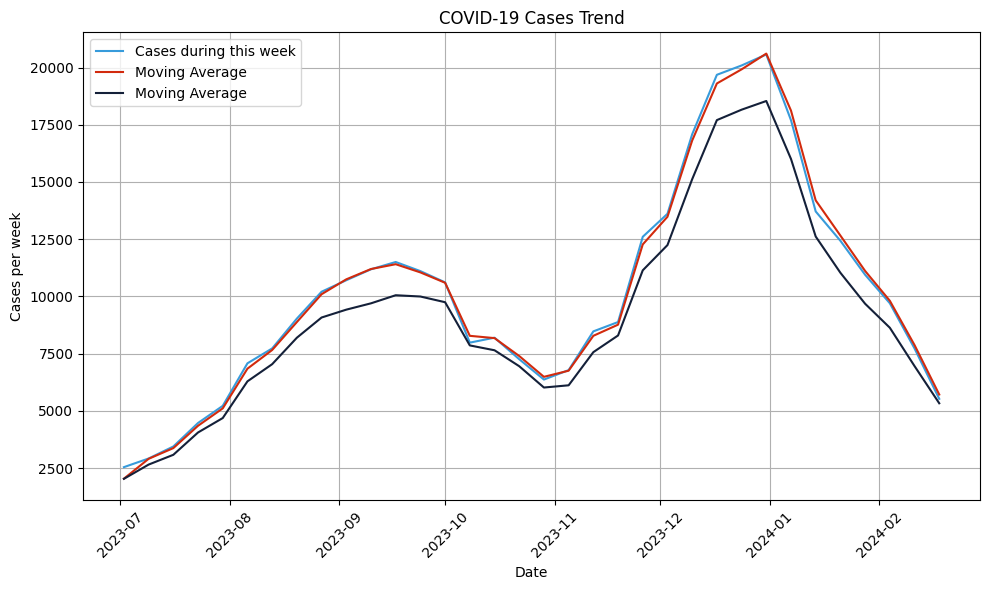

In [16]:
# df_covid['Weekly_Case_Rate_Moving_Average'] = df_covid['Weekly case rate'].rolling(window=7).mean()
# df_covid['Weekly_Death_Rate_Moving_Average'] = df_covid['Week death rate'].rolling(window=7).mean()
#Plot rolling statistics
# Group the data by Week Start Date and calculate total cases and deaths
trend_data = df_covid.groupby('Week Start Date').agg({
    'Cases during this week': 'sum',
    'rolling_avg': 'sum',
    'rolling_std': 'sum'
}).reset_index()

# Plot the trend visualization
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Week Start Date'], trend_data['Cases during this week'], color='#379BDB',label='Cases during this week')
plt.plot(trend_data['Week Start Date'], trend_data['rolling_avg'], color='#D22A0D', label='Moving Average')
plt.plot(trend_data['Week Start Date'], trend_data['rolling_std'], color='#142039', label='Moving Average')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cases per week')
plt.title('COVID-19 Cases Trend')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
#Standard ARIMA Model

ARIMA_model = pm.auto_arima(df_covid['Cases during this week'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())






                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  680
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -5181.292
Date:                Sun, 31 Mar 2024   AIC                          10376.584
Time:                        12:55:58   BIC                          10408.239
Sample:                             0   HQIC                         10388.837
                                - 680                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0838      0.036     30.500      0.000       1.014       1.153
ar.L2         -0.6055      0.057    -10.659      0.000      -0.717      -0.494
ar.L3          0.5188      0.041     12.575      0.0

In [18]:
# from docx import Document
# # Create a new Word document
# doc = Document()

# # Add a title to the document
# doc.add_heading('ARIMA Model Results', level=1)

# # Add the ARIMA model summary to the document
# doc.add_heading('Summary', level=2)
# doc.add_paragraph(ARIMA_model.summary().as_text())

# # Save the document
# # doc.save('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Project/ALY6150_MOD2_GA_1.docx')

ModuleNotFoundError: No module named 'exceptions'

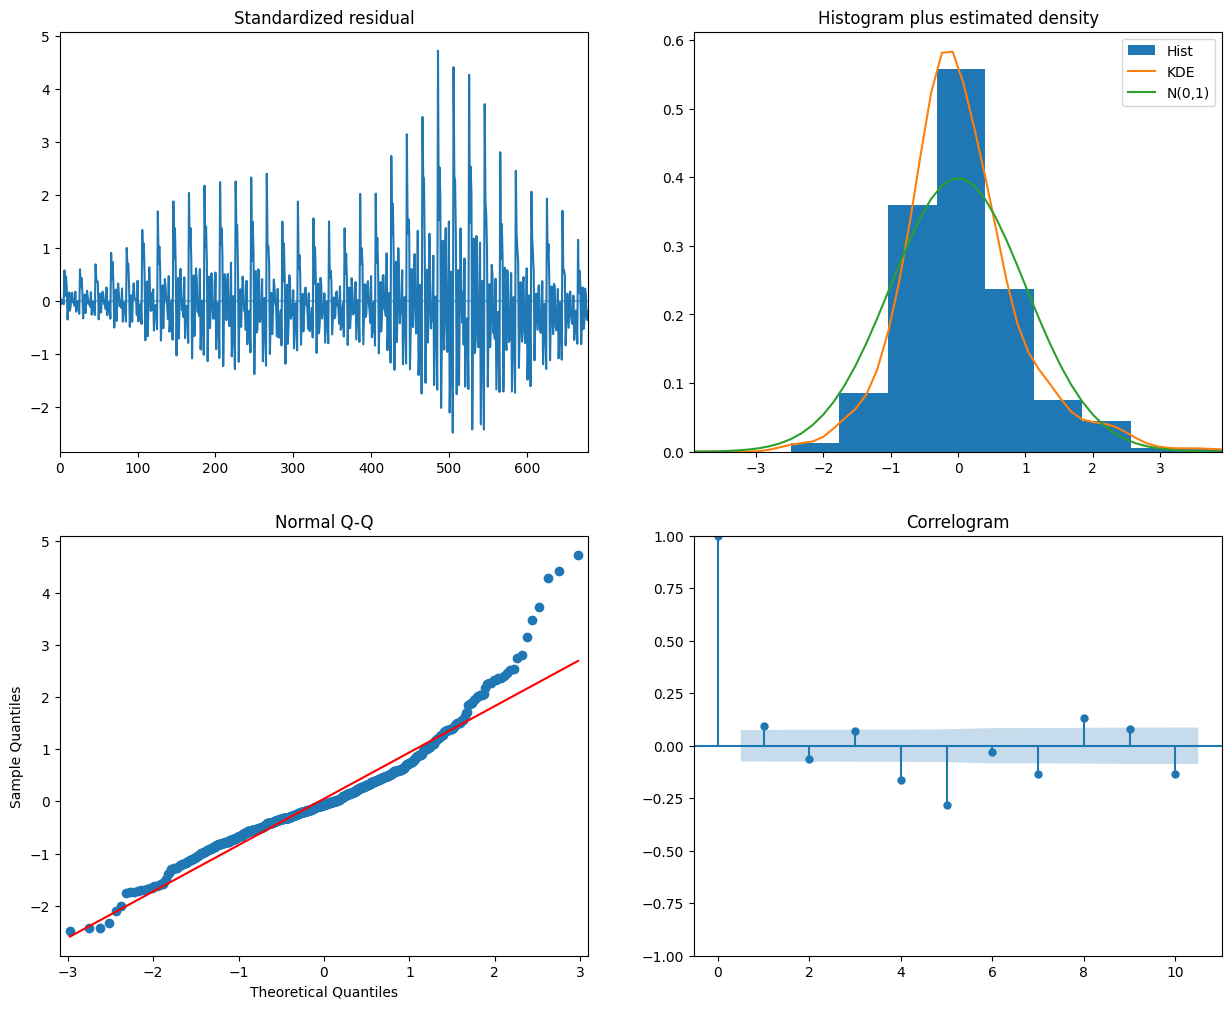

In [19]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Time_Series_Forecasting_Covid19/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Figure size 1500x700 with 0 Axes>

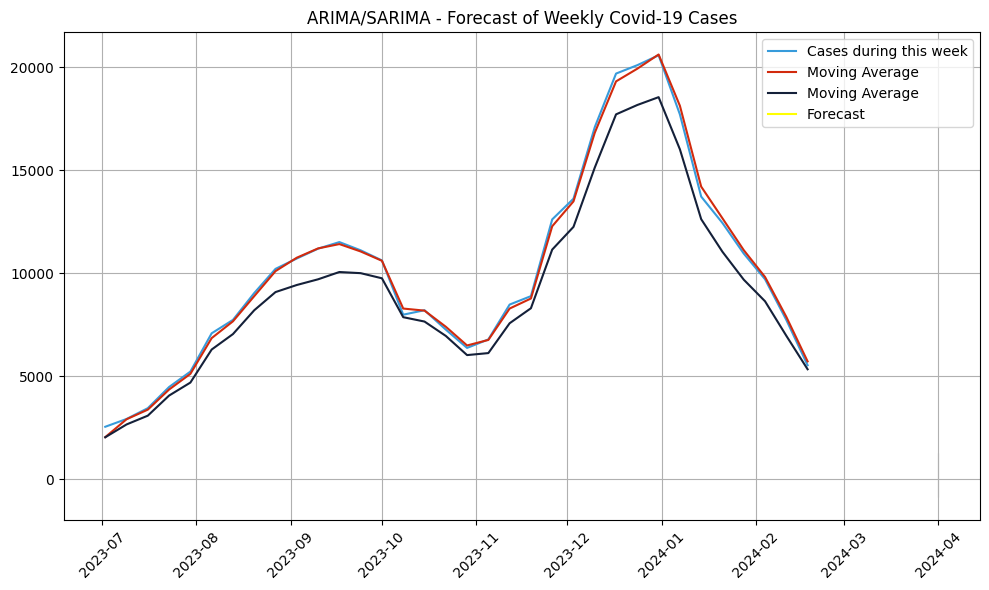

In [20]:
# df_covid['Weekly_Case_Rate_Moving_Average'] = df_covid['Weekly case rate'].rolling(window=7).mean()
# df_covid['Weekly_Death_Rate_Moving_Average'] = df_covid['Week death rate'].rolling(window=7).mean()
#Plot rolling statistics
# Group the data by Week Start Date and calculate total cases and deaths
def forecast(ARIMA_model, periods=1):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df_covid.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.figure(figsize=(10, 6))
    plt.plot(trend_data['Week Start Date'], trend_data['Cases during this week'], color='#379BDB',label='Cases during this week')
    plt.plot(trend_data['Week Start Date'], trend_data['rolling_avg'], color='#D22A0D', label='Moving Average')
    plt.plot(trend_data['Week Start Date'], trend_data['rolling_std'], color='#142039', label='Moving Average')
    plt.plot(fitted_series, color='yellow', label='Forecast')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Weekly Covid-19 Cases")
    
    # Add legend
    plt.legend()

# Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

forecast(ARIMA_model)

/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Time_Series_Forecasting_Covid19/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


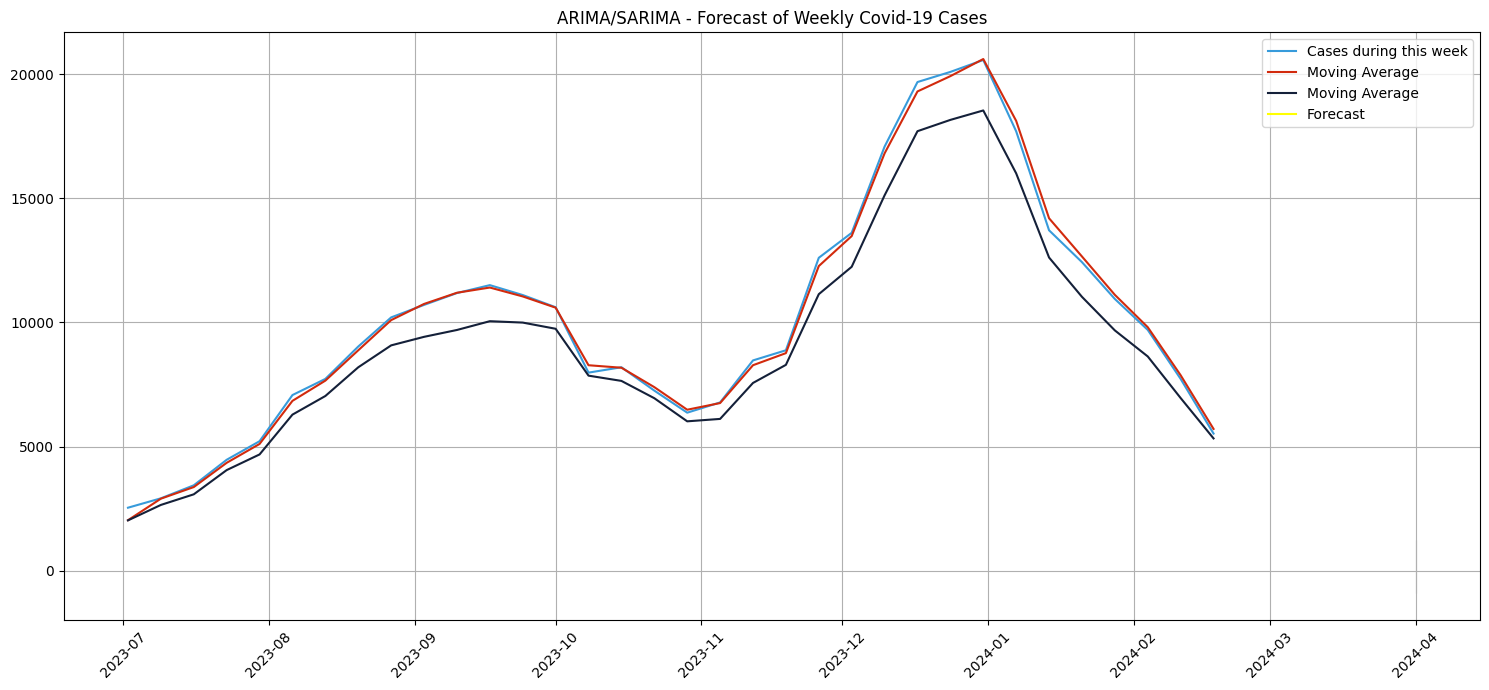

In [29]:
# Z-score Transformation

def forecast(ARIMA_model, periods=1):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df_covid.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # Calculate Z scores
    mean = df_covid['Cases during this week'].rolling(window=7).mean()
    std = df_covid['Cases during this week'].rolling(window=7).std()
    z_scores = (fitted - mean.iloc[-1]) / std.iloc[-1]

    # make series for plotting purpose
    fitted_series = pd.Series(z_scores, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(trend_data['Week Start Date'], trend_data['Cases during this week'], color='#379BDB',label='Cases during this week')
    plt.plot(trend_data['Week Start Date'], trend_data['rolling_avg'], color='#D22A0D', label='Moving Average')
    plt.plot(trend_data['Week Start Date'], trend_data['rolling_std'], color='#142039', label='Moving Average')
    plt.plot(fitted_series, color='yellow', label='Forecast')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Weekly Covid-19 Cases")
    
    # Add legend
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

forecast(ARIMA_model)


In [21]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(df_covid["Cases during this week"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

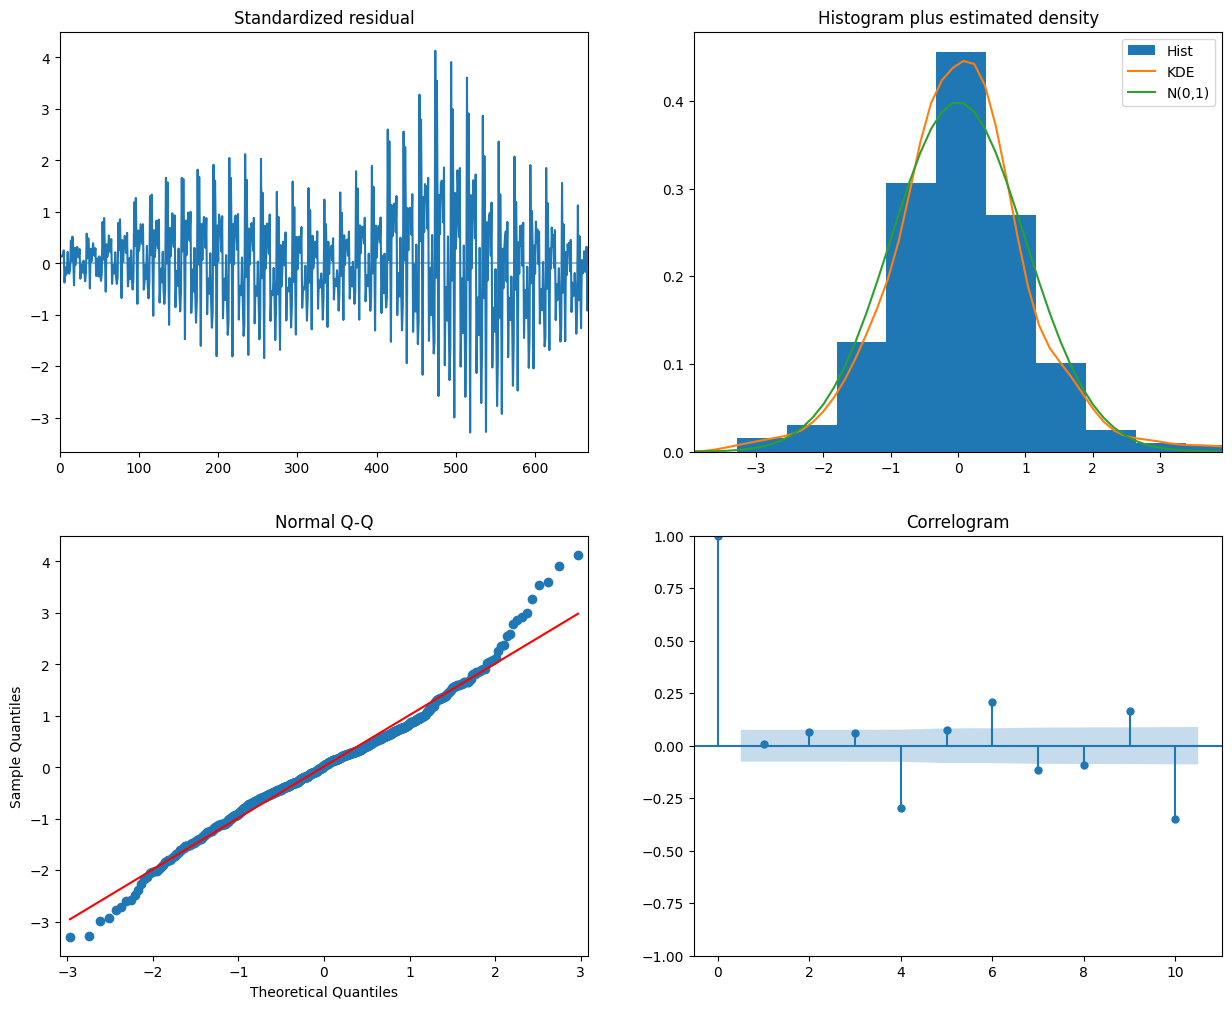

In [22]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Time_Series_Forecasting_Covid19/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Figure size 1500x700 with 0 Axes>

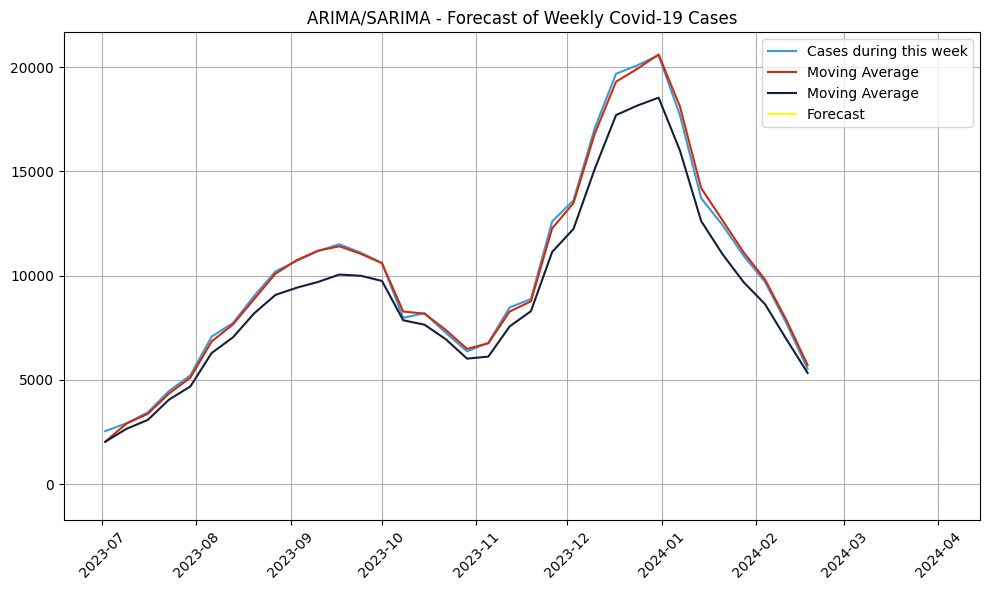

In [23]:
forecast(SARIMA_model)

In [24]:
predicted_values = SARIMA_model.predict(n_periods=4)
print(predicted_values)

680    494.472288
681    433.642583
682    418.398081
683    329.531860
dtype: float64


/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Time_Series_Forecasting_Covid19/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
